<a href="https://colab.research.google.com/github/cavalcanteprofissional/Estudo-de-Caso-sobre-Turismo-e-Aprendizado-de-M-quina/blob/main/Estudo_de_Caso_sobre_Turismo_e_Aprendizado_de_M%C3%A1quina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importação de bibliotecas

from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
from io import StringIO
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score, mean_squared_error, r2_score)
from sklearn.model_selection import (GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split)

# Etapas do Trabalho: Estudo de Caso sobre Turismo e Aprendizado de Máquina

# 1. Definição do Escopo do Projeto:
* Escolher uma região específica do Brasil para análise: **A Região Nordeste do Brasil**.
* Delimitar os objetivos do estudo, como entender padrões de fluxo de turistas e identificar fatores que afetam o turismo: **Predição de Regiões Turísticas Promissoras**.

# 2. Coleta de Dados:
* Identificação de Fontes de Dados:
  * Pesquisar e selecionar fontes confiáveis de dados sobre
turismo, como dados do IBGE, secretarias de turismo
estaduais, e plataformas de dados abertos.

In [ ]:
# URLs dos datasets relevantes
urls = {
    "CHEGADA_2009": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/942e84f4-93e7-406f-8314-e860cd1d80d3/download/chegadas_2009.csv",
    "CHEGADA_2010": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/44cee3ac-a507-49c1-9320-20ecdb7353c1/download/chegadas_2010.csv",
    "CHEGADA_2011": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/410f90a1-7287-4487-a8a3-142f8c37d87c/download/chegadas_2011.csv",
    "CHEGADA_2012": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/ec9c41a2-6b1e-46b3-a93f-f46e0adfc2d7/download/chegadas_2012.csv",
    "CHEGADA_2013": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/97dbba8c-2c8e-4055-baae-6361c3ba2e79/download/chegadas_2013.csv",
    "CHEGADA_2014": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/669597f4-217f-4762-ab47-80c17238ce64/download/chegadas_2014.csv",
    "CHEGADA_2015": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/e0e4ffa2-fab1-4a06-a5a5-3b8986a1a331/download/chegadas_2015.csv",
    "CHEGADA_2016": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/7a04c1d4-482d-4359-b04e-0907b6407c08/download/chegadas_2016.csv",
    "CHEGADA_2017": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/86134fdc-fbfe-44d0-ad2e-315b16f70233/download/chegadas_2017.csv",
    "CHEGADA_2018": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/7495cab5-6597-4015-95ec-d161d756ee41/download/chegadas_2018.csv",
    "CHEGADA_2019": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/24057369-a5dc-45b4-a66f-9a6a8f8e3422/download/chegadas_2019.csv",
    "CHEGADA_2020": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/92e6e604-156f-4e69-830b-9c34abcd14cb/download/chegadas_2020.csv",
    "CHEGADA_2021": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/21f188c3-5d93-4124-ae5c-135490a26acf/download/chegadas_2021.csv",
    "CHEGADA_2022": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/8df14749-5e61-4887-90d0-c9ad7af3a14c/download/chegadas_2022.csv",
    "CHEGADA_2023": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/24761490-6668-4a55-84a6-994d0e9cf84d/download/chegadas_2023.csv",
    "CHEGADA_2024": "https://dados.turismo.gov.br/dataset/184e0ddd-7eaf-488d-ad84-0331219d6e99/resource/a1336a87-2458-4034-bc13-fb4e3523db2f/download/chegadas_2024.csv"
}

# Função para baixar e carregar CSVs
def load_csv_from_url(url):
    try:
        response = requests.get(url)
        response.raise_for_status()  # Verifica se a requisição foi bem-sucedida
        return pd.read_csv(StringIO(response.text), encoding='utf-8', sep=';')
    except requests.exceptions.RequestException as e:
        print(f"Erro ao baixar {url}: {e}")
        return None

# Carregar todos os datasets
datasets_chegadas = {name: load_csv_from_url(url) for name, url in urls.items()}

# Verificar se os datasets foram carregados corretamente
for name, df in datasets_chegadas.items():
    if df is not None:
        print(f"Dataset {name} carregado com sucesso! Shape: {df.shape}")
    else:
        print(f"Falha ao carregar o dataset {name}.")

Dataset CHEGADA_2009 carregado com sucesso! Shape: (22176, 12)
Dataset CHEGADA_2010 carregado com sucesso! Shape: (22176, 12)
Dataset CHEGADA_2011 carregado com sucesso! Shape: (22176, 12)
Dataset CHEGADA_2012 carregado com sucesso! Shape: (22848, 12)
Dataset CHEGADA_2013 carregado com sucesso! Shape: (20832, 12)
Dataset CHEGADA_2014 carregado com sucesso! Shape: (27552, 12)
Dataset CHEGADA_2015 carregado com sucesso! Shape: (46872, 12)
Dataset CHEGADA_2016 carregado com sucesso! Shape: (44640, 12)
Dataset CHEGADA_2017 carregado com sucesso! Shape: (43524, 12)
Dataset CHEGADA_2018 carregado com sucesso! Shape: (46872, 12)
Dataset CHEGADA_2019 carregado com sucesso! Shape: (49104, 12)
Dataset CHEGADA_2020 carregado com sucesso! Shape: (47988, 12)
Dataset CHEGADA_2021 carregado com sucesso! Shape: (55800, 12)
Dataset CHEGADA_2022 carregado com sucesso! Shape: (54684, 12)
Dataset CHEGADA_2023 carregado com sucesso! Shape: (34764, 12)
Dataset CHEGADA_2024 carregado com sucesso! Shape: (228

In [ ]:
# Exibir cabeçalho dos datasets para análise
for name, df in datasets_chegadas.items():
    print(f"Cabeçalho do dataset {name}:")
    display(df.head())

Cabeçalho do dataset CHEGADA_2009:


,Continente,Ordem continente,País,Ordem país,UF,Ordem UF,Via de acesso,Ordem via de acesso,Ano,Mês,Ordem mês,Chegadas
0,África,1,África do Sul,2,Amazonas,4,Aérea,1,2009,janeiro,1,6
1,África,1,Angola,6,Amazonas,4,Aérea,1,2009,janeiro,1,0
2,África,1,Cabo Verde,35,Amazonas,4,Aérea,1,2009,janeiro,1,0
3,África,1,Nigéria,162,Amazonas,4,Aérea,1,2009,janeiro,1,1
4,África,1,Outros países,998,Amazonas,4,Aérea,1,2009,janeiro,1,2


Cabeçalho do dataset CHEGADA_2010:


,Continente,Ordem continente,País,Ordem país,UF,Ordem UF,Via de acesso,Ordem via de acesso,Ano,Mês,Ordem mês,Chegadas
0,África,1,África do Sul,2,Amazonas,4,Aérea,1,2010,janeiro,1,3
1,África,1,Angola,6,Amazonas,4,Aérea,1,2010,janeiro,1,1
2,África,1,Cabo Verde,35,Amazonas,4,Aérea,1,2010,janeiro,1,0
3,África,1,Nigéria,162,Amazonas,4,Aérea,1,2010,janeiro,1,0
4,África,1,Outros países,998,Amazonas,4,Aérea,1,2010,janeiro,1,0


Cabeçalho do dataset CHEGADA_2011:


,Continente,Ordem continente,País,Ordem país,UF,Ordem UF,Via de acesso,Ordem via de acesso,Ano,Mês,Ordem mês,Chegadas
0,África,1,África do Sul,2,Amazonas,4,Aérea,1,2011,janeiro,1,1
1,África,1,Angola,6,Amazonas,4,Aérea,1,2011,janeiro,1,2
2,África,1,Cabo Verde,35,Amazonas,4,Aérea,1,2011,janeiro,1,0
3,África,1,Nigéria,162,Amazonas,4,Aérea,1,2011,janeiro,1,0
4,África,1,Outros países,998,Amazonas,4,Aérea,1,2011,janeiro,1,2


Cabeçalho do dataset CHEGADA_2012:


,Continente,Ordem continente,País,Ordem país,UF,Ordem UF,Via de acesso,Ordem via de acesso,Ano,Mês,Ordem mês,Chegadas
0,África,1,África do Sul,2,Amazonas,4,Aérea,1,2012,janeiro,1,0.0
1,África,1,Angola,6,Amazonas,4,Aérea,1,2012,janeiro,1,0.0
2,África,1,Cabo Verde,35,Amazonas,4,Aérea,1,2012,janeiro,1,0.0
3,África,1,Nigéria,162,Amazonas,4,Aérea,1,2012,janeiro,1,0.0
4,África,1,Outros países,998,Amazonas,4,Aérea,1,2012,janeiro,1,1.0


Cabeçalho do dataset CHEGADA_2013:


,Continente,Ordem continente,País,Ordem país,UF,Ordem UF,Via de acesso,Ordem via de acesso,Ano,Mês,Ordem mês,Chegadas
0,África,1,África do Sul,2,Paraná,16,Terrestre,2,2013,janeiro,1,189
1,África,1,Angola,6,Paraná,16,Terrestre,2,2013,janeiro,1,117
2,África,1,Cabo Verde,35,Paraná,16,Terrestre,2,2013,janeiro,1,4
3,África,1,Nigéria,162,Paraná,16,Terrestre,2,2013,janeiro,1,0
4,África,1,África do Sul,2,Amazonas,4,Aérea,1,2013,janeiro,1,0


Cabeçalho do dataset CHEGADA_2014:


,Continente,Ordem continente,País,Ordem país,UF,Ordem UF,Via de acesso,Ordem via de acesso,Ano,Mês,Ordem mês,Chegadas
0,África,1,África do Sul,2,Amazonas,4,Aérea,1,2014,janeiro,1,0.0
1,África,1,Angola,6,Amazonas,4,Aérea,1,2014,janeiro,1,0.0
2,África,1,Cabo Verde,35,Amazonas,4,Aérea,1,2014,janeiro,1,0.0
3,África,1,Nigéria,162,Amazonas,4,Aérea,1,2014,janeiro,1,0.0
4,África,1,Outros países,998,Amazonas,4,Aérea,1,2014,janeiro,1,2.0


Cabeçalho do dataset CHEGADA_2015:


,Continente,Ordem continente,País,Ordem país,UF,Ordem UF,Via de acesso,Ordem via de acesso,ano,Mês,Ordem mês,Chegadas
0,África,1,África do Sul,2,Acre,1,Terrestre,2,2015,janeiro,1,2
1,África,1,Angola,6,Acre,1,Terrestre,2,2015,janeiro,1,0
2,África,1,Cabo Verde,35,Acre,1,Terrestre,2,2015,janeiro,1,0
3,África,1,Egito,60,Acre,1,Terrestre,2,2015,janeiro,1,0
4,África,1,Gana,77,Acre,1,Terrestre,2,2015,janeiro,1,0


Cabeçalho do dataset CHEGADA_2016:


,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
0,África,1,África do Sul,2,Acre,1,Terrestre,2,2016,janeiro,1,1
1,África,1,Angola,6,Acre,1,Terrestre,2,2016,janeiro,1,0
2,África,1,Cabo Verde,35,Acre,1,Terrestre,2,2016,janeiro,1,0
3,África,1,Egito,60,Acre,1,Terrestre,2,2016,janeiro,1,2
4,África,1,Gana,77,Acre,1,Terrestre,2,2016,janeiro,1,0


Cabeçalho do dataset CHEGADA_2017:


,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
0,África,1,África do Sul,2,Acre,1,Terrestre,2,2017,janeiro,1,0
1,África,1,Angola,6,Acre,1,Terrestre,2,2017,janeiro,1,0
2,África,1,Cabo Verde,35,Acre,1,Terrestre,2,2017,janeiro,1,0
3,África,1,Egito,60,Acre,1,Terrestre,2,2017,janeiro,1,0
4,África,1,Gana,77,Acre,1,Terrestre,2,2017,janeiro,1,0


Cabeçalho do dataset CHEGADA_2018:


,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
0,África,1,África do Sul,2,Acre,1,Fluvial,4,2018,janeiro,1,0
1,África,1,África do Sul,2,Acre,1,Fluvial,4,2018,fevereiro,2,0
2,África,1,África do Sul,2,Acre,1,Fluvial,4,2018,março,3,0
3,África,1,África do Sul,2,Acre,1,Fluvial,4,2018,abril,4,0
4,África,1,África do Sul,2,Acre,1,Fluvial,4,2018,maio,5,0


Cabeçalho do dataset CHEGADA_2019:


,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
0,África,1,África do Sul,2,Acre,1,Aérea,1,2019,janeiro,1,0
1,África,1,África do Sul,2,Acre,1,Aérea,1,2019,fevereiro,2,0
2,África,1,África do Sul,2,Acre,1,Aérea,1,2019,março,3,0
3,África,1,África do Sul,2,Acre,1,Aérea,1,2019,abril,4,0
4,África,1,África do Sul,2,Acre,1,Aérea,1,2019,maio,5,0


Cabeçalho do dataset CHEGADA_2020:


,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
0,África,1,África do Sul,2,Acre,1,Aérea,1,2020,janeiro,1,0
1,África,1,Angola,6,Acre,1,Aérea,1,2020,janeiro,1,0
2,África,1,Cabo Verde,35,Acre,1,Aérea,1,2020,janeiro,1,0
3,África,1,Egito,60,Acre,1,Aérea,1,2020,janeiro,1,0
4,África,1,Gana,77,Acre,1,Aérea,1,2020,janeiro,1,0


Cabeçalho do dataset CHEGADA_2021:


,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
0,África,1,África do Sul,2,Acre,1,Aérea,1,2021,janeiro,1,0
1,África,1,África do Sul,2,Acre,1,Aérea,1,2021,fevereiro,2,0
2,África,1,África do Sul,2,Acre,1,Aérea,1,2021,março,3,0
3,África,1,África do Sul,2,Acre,1,Aérea,1,2021,abril,4,0
4,África,1,África do Sul,2,Acre,1,Aérea,1,2021,maio,5,0


Cabeçalho do dataset CHEGADA_2022:


,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
0,África,1,África do Sul,2,Acre,1,Aérea,1,2022,Janeiro,1,0
1,África,1,África do Sul,2,Acre,1,Aérea,1,2022,Fevereiro,2,0
2,África,1,África do Sul,2,Acre,1,Aérea,1,2022,março,3,0
3,África,1,África do Sul,2,Acre,1,Aérea,1,2022,Abril,4,0
4,África,1,África do Sul,2,Acre,1,Aérea,1,2022,Maio,5,0


Cabeçalho do dataset CHEGADA_2023:


,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
0,América do Sul,4,Peru,34,Acre,1,Aéreo,1,2023,Novembro,11,0
1,América do Sul,4,Peru,34,Acre,1,Aéreo,1,2023,Novembro,11,0
2,Ásia,5,Outros países,56,Outras Unidades da Federação,99,Aéreo,1,2023,Junho,6,0
3,Europa,6,Alemanha,57,Outras Unidades da Federação,99,Aéreo,1,2023,Janeiro,1,12
4,Europa,6,Alemanha,57,Outras Unidades da Federação,99,Aéreo,1,2023,Fevereiro,2,10


Cabeçalho do dataset CHEGADA_2024:


,Continente,cod continente,País,cod pais,UF,cod uf,Via,cod via,ano,Mês,cod mes,Chegadas
0,Europa,6,Alemanha,57,Outras Unidades da Federação,99,Aérea,1,2024,Janeiro,1,10
1,América do Sul,4,Argentina,26,Outras Unidades da Federação,99,Aérea,1,2024,Janeiro,1,1197
2,Europa,6,Bélgica,59,Outras Unidades da Federação,99,Aérea,1,2024,Janeiro,1,3
3,América do Norte,3,Canadá,23,Outras Unidades da Federação,99,Aérea,1,2024,Janeiro,1,2
4,América do Sul,4,Chile,28,Outras Unidades da Federação,99,Aérea,1,2024,Janeiro,1,1


# 3. Limpeza e Preparação dos Dados:

In [ ]:
# Concatenar todos os datasets de chegada em um único DataFrame
chegada_consolidado = pd.concat(datasets_chegadas.values(), ignore_index=True)

In [ ]:
# Função para unificar as colunas 'Ano' e 'ano'
def unificar_colunas_Ano(df):
    if 'ano' in df.columns and 'Ano' in df.columns:
        # Preencher valores ausentes em 'Ano' com valores de 'ano'
        df['Ano'] = df['Ano'].fillna(df['ano'])
        # Remover a coluna 'ano' do DataFrame
        df = df.drop(columns=['ano'])
    return df

# Aplicar a função de unificação
chegada_consolidado = unificar_colunas_Ano(chegada_consolidado)

# Converter a coluna 'Ano' de float para int sem inplace
chegada_consolidado['Ano'] = chegada_consolidado['Ano'].astype(int)

print(chegada_consolidado.dtypes)  # Verificar se a conversão foi bem-sucedida

Continente              object
Ordem continente       float64
País                    object
Ordem país             float64
UF                      object
Ordem UF               float64
Via de acesso           object
Ordem via de acesso    float64
Ano                      int64
Mês                     object
Ordem mês              float64
Chegadas               float64
cod continente         float64
cod pais               float64
cod uf                 float64
Via                     object
cod via                float64
cod mes                float64
dtype: object


In [ ]:
# Função para unificar as colunas 'Via de acesso' e 'Via'
def unificar_colunas_Via(df):
    if 'Via de acesso' in df.columns and 'Via' in df.columns:
        # Preencher valores ausentes em 'Via de acesso' com valores de 'Via'
        df['Via de acesso'] = df['Via de acesso'].fillna(df['Via'])
        # Remover a coluna 'Via de acesso' do DataFrame
        df = df.drop(columns=['Via'])
    return df

# Aplicar a função de unificação
chegada_consolidado = unificar_colunas_Via(chegada_consolidado)

print(chegada_consolidado.dtypes)  # Verificar se a unificação foi bem-sucedida

Continente              object
Ordem continente       float64
País                    object
Ordem país             float64
UF                      object
Ordem UF               float64
Via de acesso           object
Ordem via de acesso    float64
Ano                      int64
Mês                     object
Ordem mês              float64
Chegadas               float64
cod continente         float64
cod pais               float64
cod uf                 float64
cod via                float64
cod mes                float64
dtype: object


In [ ]:
# Função para padronizar os valores na coluna "Via de acesso" no gênero feminino
def padronizar_via_acesso(df):
    if 'Via de acesso' in df.columns:
        df['Via de acesso'] = df['Via de acesso'].replace({
            'Marítimo': 'Marítima',
            'Aéreo': 'Aérea'
        })
    return df

# Aplicar a função no dataset
chegada_consolidado = padronizar_via_acesso(chegada_consolidado)

# Verificar os valores únicos após a padronização
print(chegada_consolidado['Via de acesso'].unique())

['Aérea' 'Marítima' 'Terrestre' 'Fluvial']


In [ ]:
# Função para remover colunas que começam com 'cod' ou 'Ord'
def remover_colunas(df):
    # Filtra as colunas que começam com 'cod' ou 'Ord'
    colunas_para_remover = [coluna for coluna in df.columns if coluna.startswith('cod') or coluna.startswith('Ord')]
    # Remove as colunas do DataFrame
    df = df.drop(columns=colunas_para_remover, errors='ignore')
    return df

# Exemplo de uso
chegada_consolidado = remover_colunas(chegada_consolidado)

# Verificar as colunas restantes
print("Colunas no DataFrame após remoção:", chegada_consolidado.columns)

Colunas no DataFrame após remoção: Index(['Continente', 'País', 'UF', 'Via de acesso', 'Ano', 'Mês', 'Chegadas'], dtype='object')


In [ ]:
# Criar um dicionário para mapear os meses em números
month_mapping = {
    'Janeiro': 1, 'janeiro': 1,
    'Fevereiro': 2, 'fevereiro': 2,
    'Marco': 3, 'Março': 3, 'marco': 3, 'março': 3,
    'Abril': 4, 'abril': 4,
    'Maio': 5, 'maio': 5,
    'Junho': 6, 'junho': 6,
    'Julho': 7, 'julho': 7,
    'Agosto': 8, 'agosto': 8,
    'Setembro': 9, 'setembro': 9,
    'Outubro': 10, 'outubro': 10,
    'Novembro': 11, 'novembro': 11,
    'Dezembro': 12, 'dezembro': 12
}

# Aplicação do mapeamento
chegada_consolidado['Mês'] = chegada_consolidado['Mês'].map(month_mapping)

# Conversão da coluna de str para int
chegada_consolidado['Mês'] = pd.to_numeric(chegada_consolidado['Mês'], errors='coerce').astype('Int64')

In [ ]:
# Verificar valores ausentes
print(f"Valores ausentes no dataset:")
print(chegada_consolidado.isnull().sum())

Valores ausentes no dataset:
Continente          0
País                0
UF                  0
Via de acesso       0
Ano                 0
Mês                 0
Chegadas         2688
dtype: int64


In [ ]:
# Converter a coluna 'Chegadas' de float para int, tratando valores não finitos
chegada_consolidado['Chegadas'] = pd.to_numeric(chegada_consolidado['Chegadas'], errors='coerce').fillna(0).astype(int)

In [ ]:
chegada_consolidado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 584864 entries, 0 to 584863
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Continente     584864 non-null  object
 1   País           584864 non-null  object
 2   UF             584864 non-null  object
 3   Via de acesso  584864 non-null  object
 4   Ano            584864 non-null  int64 
 5   Mês            584864 non-null  Int64 
 6   Chegadas       584864 non-null  int64 
dtypes: Int64(1), int64(2), object(4)
memory usage: 31.8+ MB


In [ ]:
# Lista de estados do Nordeste
estados_nordeste = ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Piauí', 'Pernambuco', 'Rio Grande do Norte', 'Sergipe']

# Filtrar o dataset para manter apenas os estados do Nordeste
chegada_nordeste = chegada_consolidado[chegada_consolidado['UF'].isin(estados_nordeste)].copy()

In [ ]:
# Verificar valores ausentes
print(f"Valores ausentes no dataset:")
print(chegada_nordeste.isnull().sum())

Valores ausentes no dataset:
Continente       0
País             0
UF               0
Via de acesso    0
Ano              0
Mês              0
Chegadas         0
dtype: int64


# 4. Análise Exploratória de Dados (EDA):
* Realizar uma análise descritiva dos dados, gerando
estatísticas básicas (média, mediana, desvio padrão).

In [ ]:
# Verificar as colunas do dataset consolidado
print(chegada_nordeste.columns)

Index(['Continente', 'País', 'UF', 'Via de acesso', 'Ano', 'Mês', 'Chegadas'], dtype='object')


In [ ]:
chegada_nordeste.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112952 entries, 672 to 584651
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Continente     112952 non-null  object
 1   País           112952 non-null  object
 2   UF             112952 non-null  object
 3   Via de acesso  112952 non-null  object
 4   Ano            112952 non-null  int64 
 5   Mês            112952 non-null  Int64 
 6   Chegadas       112952 non-null  int64 
dtypes: Int64(1), int64(2), object(4)
memory usage: 7.0+ MB


In [ ]:
chegada_nordeste.head(250)

,Continente,País,UF,Via de acesso,Ano,Mês,Chegadas
672,África,África do Sul,Bahia,Aérea,2009,1,7
673,África,Angola,Bahia,Aérea,2009,1,18
674,África,Cabo Verde,Bahia,Aérea,2009,1,0
675,África,Nigéria,Bahia,Aérea,2009,1,1
676,África,Outros países,Bahia,Aérea,2009,1,24
...,...,...,...,...,...,...,...
917,América do Sul,Guiana,Bahia,Aérea,2009,5,0
918,América do Sul,Suriname,Bahia,Aérea,2009,5,2
919,América do Sul,Uruguai,Bahia,Aérea,2009,5,6
920,América do Sul,Venezuela,Bahia,Aérea,2009,5,81


In [ ]:
# Estatísticas descritivas gerais
estatisticas_gerais = chegada_nordeste['Chegadas'].describe()

# Cálculo de medidas adicionais
media_chegadas = chegada_nordeste['Chegadas'].mean()
mediana_chegadas = chegada_nordeste['Chegadas'].median()
desvio_padrao_chegadas = chegada_nordeste['Chegadas'].std()

# Exibir os resultados
print(f"Estatísticas Descritivas das Chegadas ao Nordeste:\n")
print(f"Média: {media_chegadas:,.2f}")
print(f"Mediana: {mediana_chegadas:,.2f}")
print(f"Desvio Padrão: {desvio_padrao_chegadas:,.2f}")
print(f"Valor Mínimo: {estatisticas_gerais['min']:,}")
print(f"Valor Máximo: {estatisticas_gerais['max']:,}")
print(f"Total de Entradas: {len(chegada_nordeste)}")

Estatísticas Descritivas das Chegadas ao Nordeste:

Média: 42.84
Mediana: 0.00
Desvio Padrão: 285.82
Valor Mínimo: 0.0
Valor Máximo: 17,766.0
Total de Entradas: 112952


* Criar 4 visualizações simples (gráficos de linha, gráficos de
barras) para identificar tendências e padrões.

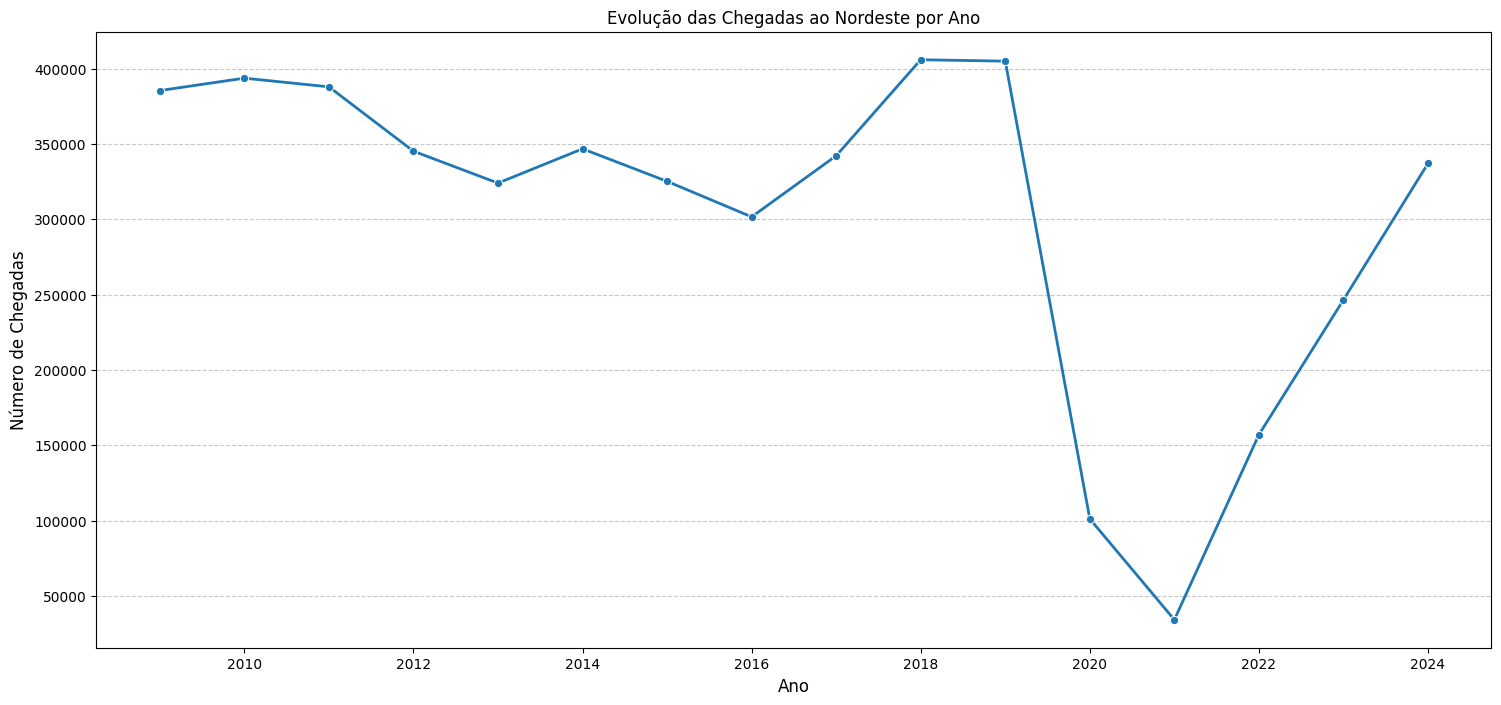

In [ ]:
# Agrupar os dados por ano e somar o número total de chegadas
chegadas_por_ano = chegada_nordeste.groupby("Ano")["Chegadas"].sum().reset_index()

# Criar o gráfico de linhas
plt.figure(figsize=(18, 8))
sns.lineplot(data=chegadas_por_ano, x="Ano", y="Chegadas", marker="o", linewidth=2)

# Personalizações do gráfico
plt.title("Evolução das Chegadas ao Nordeste por Ano")
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Número de Chegadas", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Exibir o gráfico
plt.show()

O gráfico "**Evolução das Chegadas ao Nordeste por Ano**" apresenta a evolução do número de chegadas à região Nordeste ao longo dos anos, especificamente nos anos pares de 2010 a 2024. Principais pontos observados:
* **Eixo X (Horizontal):** Representa os anos, começando em 2010 e terminando em 2024, com intervalos de dois anos.
* **Eixo Y (Vertical):** Representa o número de chegadas, que pode ser medido em unidades absolutas (como milhares ou milhões de pessoas, dependendo da escala).
* **Tendência:** O gráfico permite visualizar a tendência das chegadas ao longo do tempo, indicando se houve crescimento, declínio ou estabilidade no número de chegadas com a passagem do tempo (em anos).

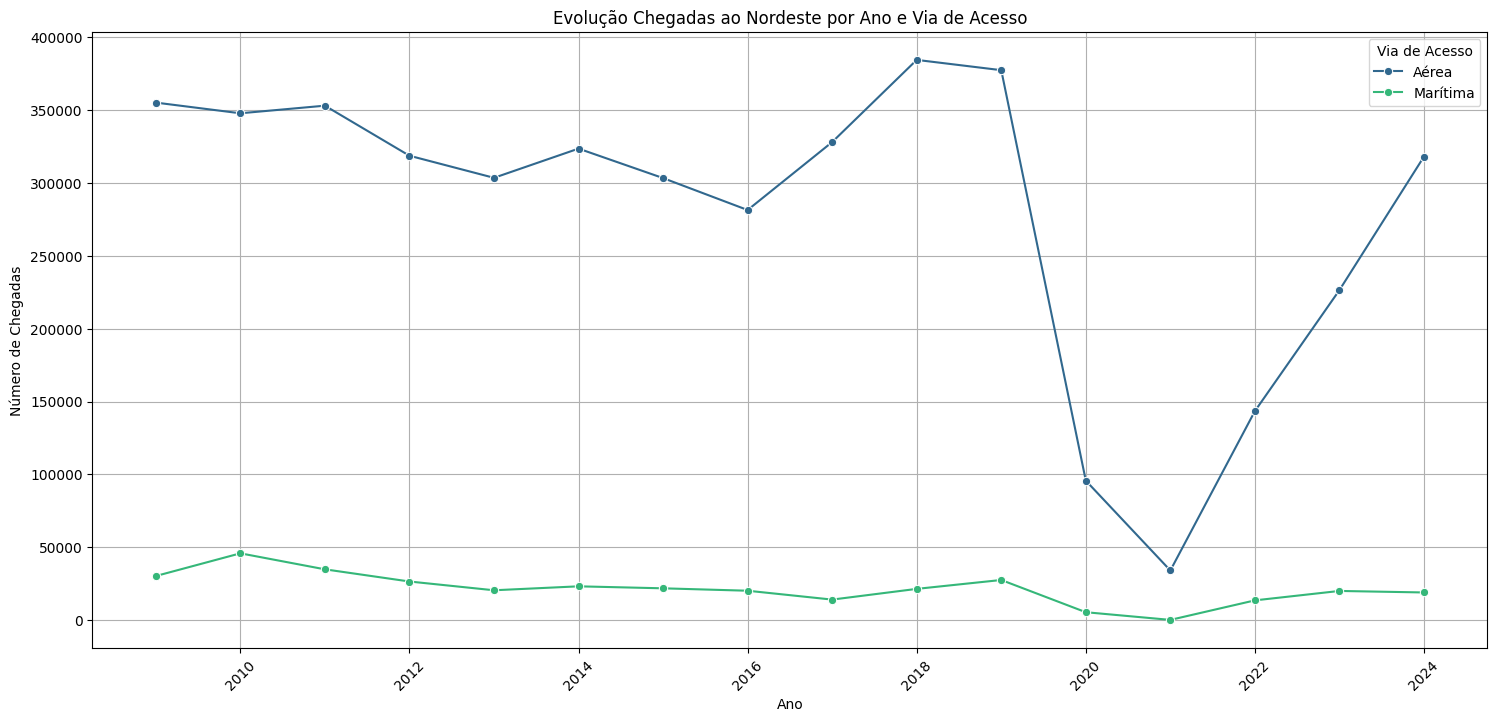

In [ ]:
# Agrupar os dados por 'Ano' e 'Via de acesso', somando as chegadas
chegadas_por_ano_via = chegada_nordeste.groupby(['Ano', 'Via de acesso'])['Chegadas'].sum().reset_index()

# Configurar o gráfico
plt.figure(figsize=(18, 8))
sns.lineplot(data=chegadas_por_ano_via, x='Ano', y='Chegadas', hue='Via de acesso', marker='o', palette='viridis')

# Ajustes no layout
plt.title("Evolução Chegadas ao Nordeste por Ano e Via de Acesso")
plt.xlabel("Ano")
plt.ylabel("Número de Chegadas")
plt.xticks(rotation=45)
plt.legend(title="Via de Acesso")
plt.grid(True)

# Exibir o gráfico
plt.show()

O gráfico de linhas "**Evolução das Chegadas ao Nordeste por Ano e Via de Acesso**" apresenta a evolução do número de chegadas à região Nordeste, diferenciando as chegadas por via de acesso (aérea e marítima) ao longo dos anos pares de 2010 a 2024. Principais pontos observados:
* **Eixo X (Horizontal):** Representa os anos, começando em 2010 e terminando em 2024, com intervalos de dois anos.
* **Eixo Y (Vertical):** Representa o número de chegadas, que pode ser medido em unidades absolutas (como milhares ou milhões de pessoas, dependendo da escala).
* **Diferenciação por Via de Acesso:** O gráfico separa as chegadas em duas categorias:
  * **Aérea:** Chegadas por meio de transporte aéreo.
  * **Marítima:** Chegadas por meio de transporte marítimo.

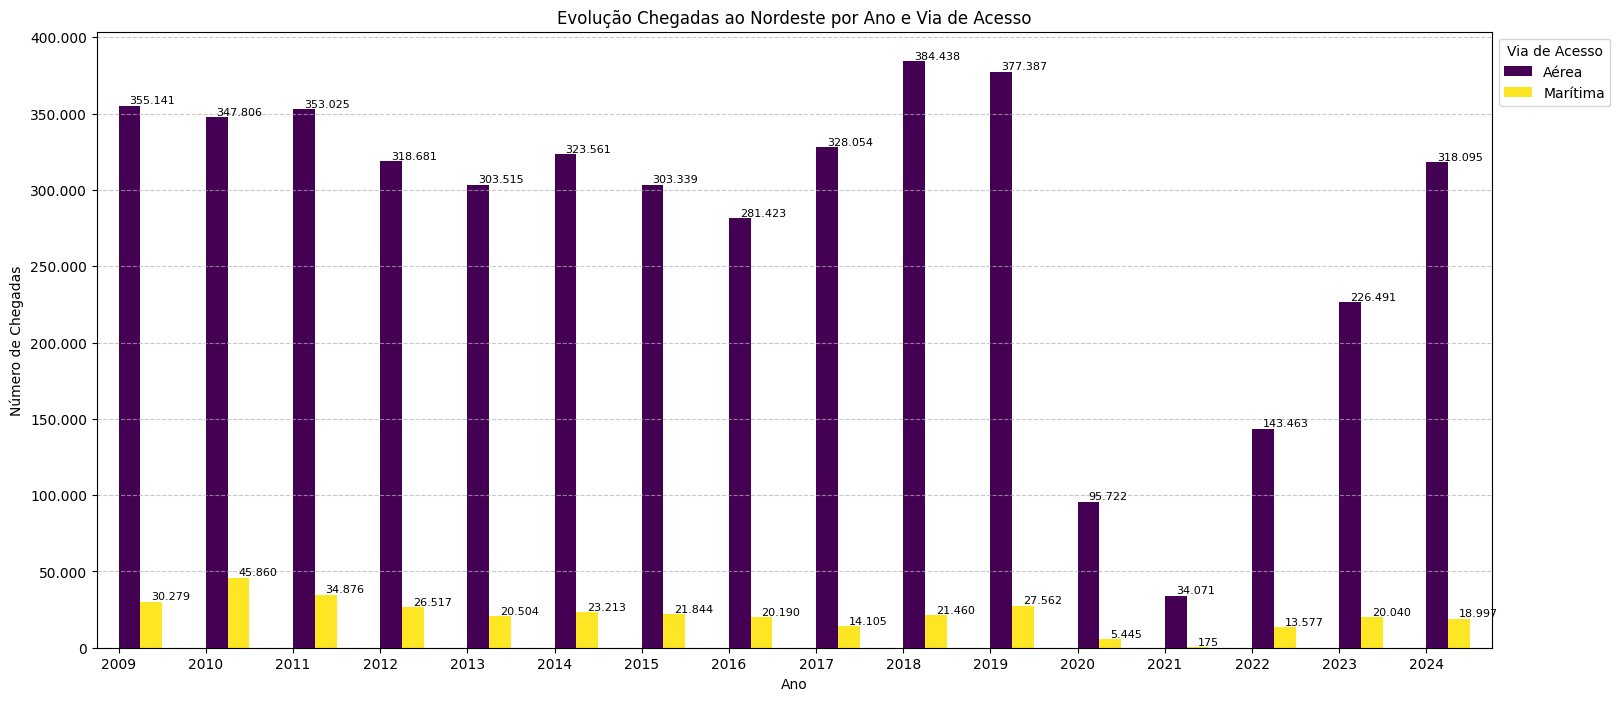

In [ ]:
# Agrupar os dados por 'Ano' e 'Via de acesso', somando as chegadas
# unstack() é usado para reorganizar os dados, criando uma coluna para cada tipo de via de acesso. Isso é necessário para fazer um gráfico empilhado.
chegadas_por_ano_via = chegada_nordeste.groupby(['Ano', 'Via de acesso'])['Chegadas'].sum().unstack()

# Configurar o gráfico
ax = chegadas_por_ano_via.plot(kind='bar', stacked=False, colormap='viridis', figsize=(18, 8), align='edge')

# Ajustes no layout
ax.set_title("Evolução Chegadas ao Nordeste por Ano e Via de Acesso")
ax.set_xlabel("Ano")
ax.set_ylabel("Número de Chegadas")
ax.legend(title="Via de Acesso", bbox_to_anchor=(1, 1), loc='upper left', fontsize=10)
ax.grid(axis="y", linestyle="--", alpha=0.7)
# Ajustando os rótulos do eixo X para ficarem na horizontal
ax.set_xticklabels(chegadas_por_ano_via.index, rotation=0)
# Adicionar valores no topo de cada barra
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height() + 5,  # Posição do texto
             f'{int(p.get_height()):,}'.replace(",","."),  # Exibir valor formatado
             ha='left', va='bottom', fontsize=8)
# Formatando o eixo Y
# Define a função formatar_quantidade para formatar os números do eixo Y
def formatar_quantidade(x, pos):
    return f'{int(x):,}'.replace(',', '.')

plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_quantidade))
plt.show()

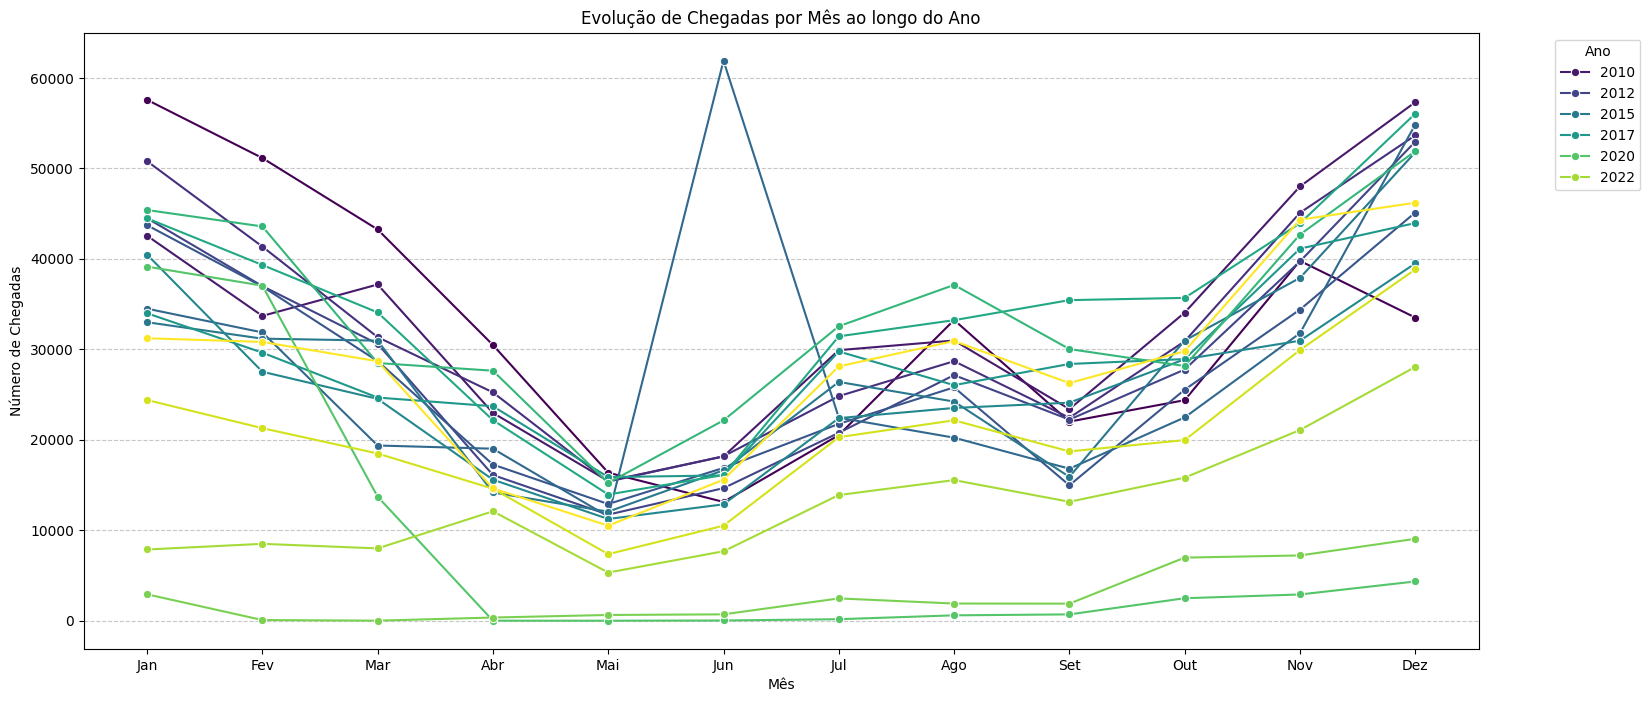

In [ ]:
# Agrupar os dados por 'Ano' e 'Mês'
chegadas_mes_ano = chegada_nordeste.groupby(['Ano', 'Mês'])['Chegadas'].sum().reset_index()

# Ordenar para evitar descontinuidade no gráfico
chegadas_mes_ano = chegadas_mes_ano.sort_values(by=['Ano', 'Mês'])

# Configurar o gráfico
plt.figure(figsize=(18, 8))
sns.lineplot(data=chegadas_mes_ano, x='Mês', y='Chegadas', hue='Ano', marker='o', palette="viridis")

# Ajustes no layout
plt.title("Evolução de Chegadas por Mês ao longo do Ano")
plt.xlabel("Mês")
plt.ylabel("Número de Chegadas")
plt.xticks(range(1, 13), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend(title="Ano", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()

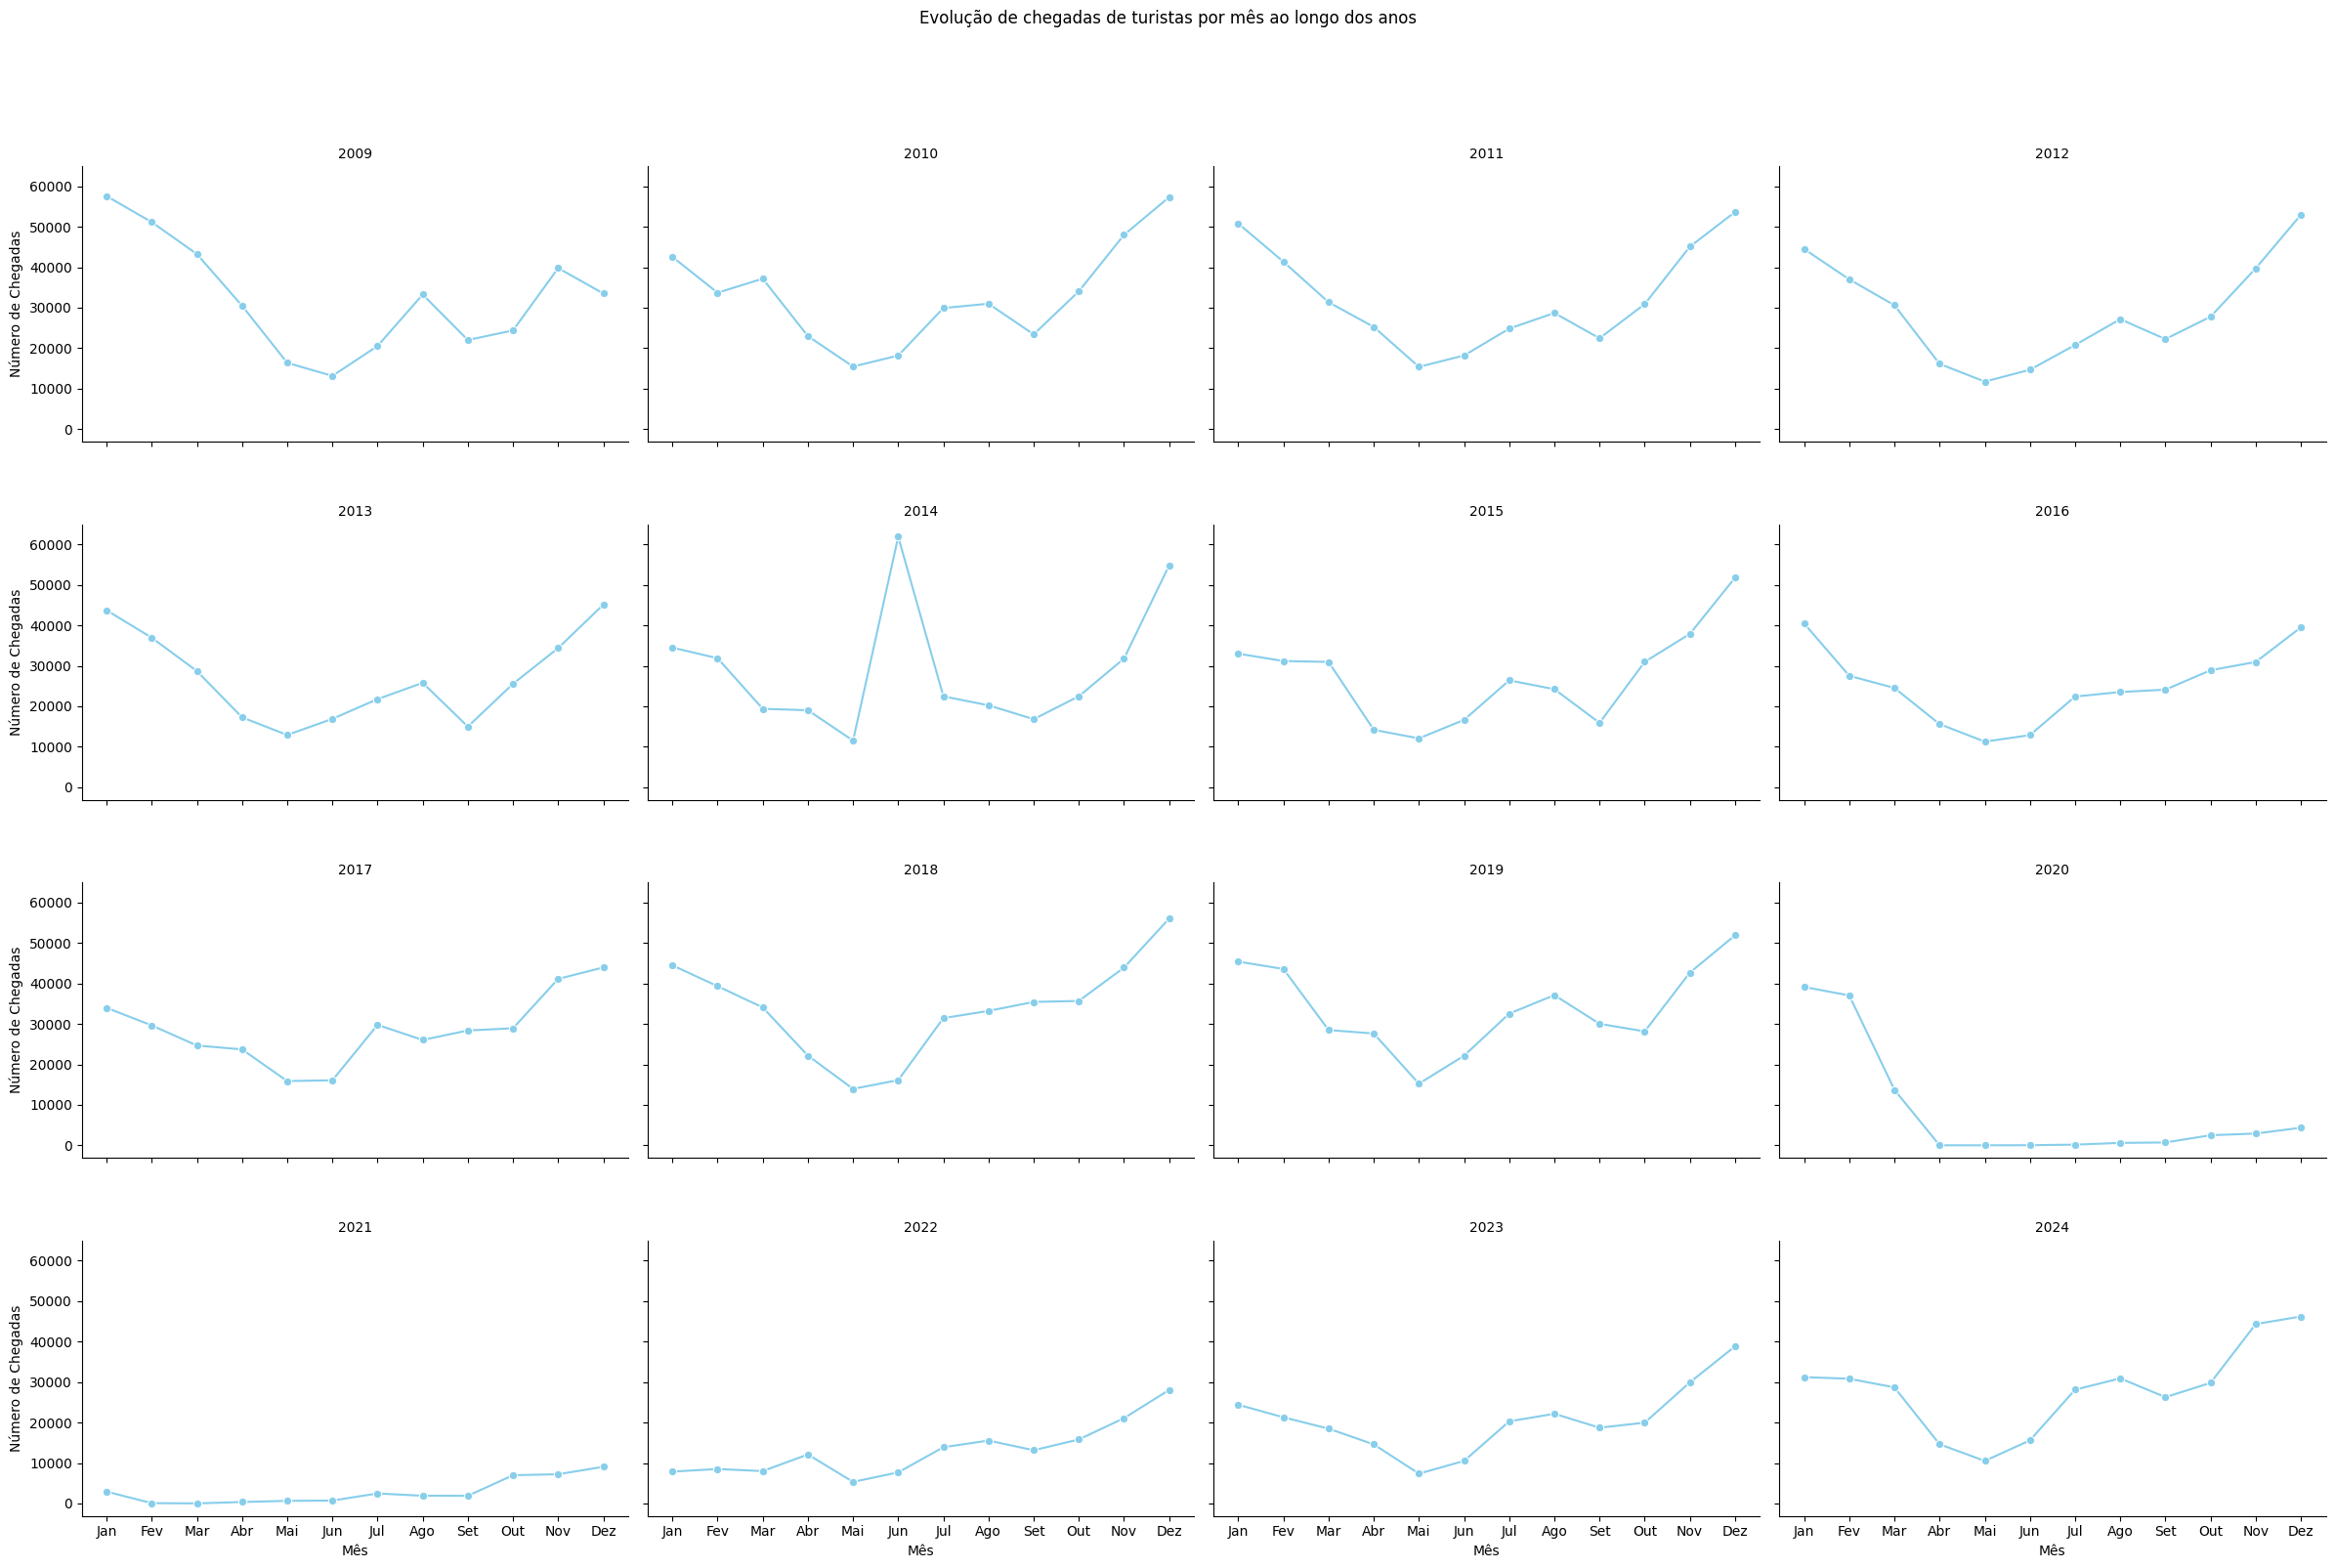

In [ ]:
# Agrupar os dados por 'Ano' e 'Mês'
chegadas_mes_ano = chegada_nordeste.groupby(['Ano', 'Mês'])['Chegadas'].sum().reset_index()

# Ordenar para evitar descontinuidade no gráfico
chegadas_mes_ano = chegadas_mes_ano.sort_values(by=['Ano', 'Mês'])

# Configurar o gráfico de facetas
g = sns.FacetGrid(chegadas_mes_ano, col='Ano', col_wrap=4, height=4, aspect=1.5)
g.map(sns.lineplot, 'Mês', 'Chegadas', marker='o', color='skyblue')

# Ajustes nos rótulos e ticks
g.set_axis_labels("Mês", "Número de Chegadas")
g.set(xticks=range(1, 13), xticklabels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
g.set_titles(col_template='{col_name}')  # Remove "Ano = "
g.fig.subplots_adjust(top=0.9, hspace=0.3)           # Ajusta o espaço superior para aproximar os títulos
g.fig.suptitle("Evolução de chegadas de turistas por mês ao longo dos anos", y=1)
# Exibir o gráfico
plt.show()

O gráfico intitulado "**Evolução de Chegadas por Mês ao longo do Ano**" apresenta a evolução do número de chegadas à região Nordeste, detalhando a distribuição mensal ao longo de vários anos (2010, 2012, 2015, 2017, 2020 e 2022). Principais pontos observados:
* **Eixo X (Horizontal):** Representa os meses do ano, de Janeiro (Jan) a Dezembro (Dec).
* **Eixo Y (Vertical):** Representa o número de chegadas, que pode ser medido em unidades absolutas (como milhares ou milhões de pessoas, dependendo da escala).

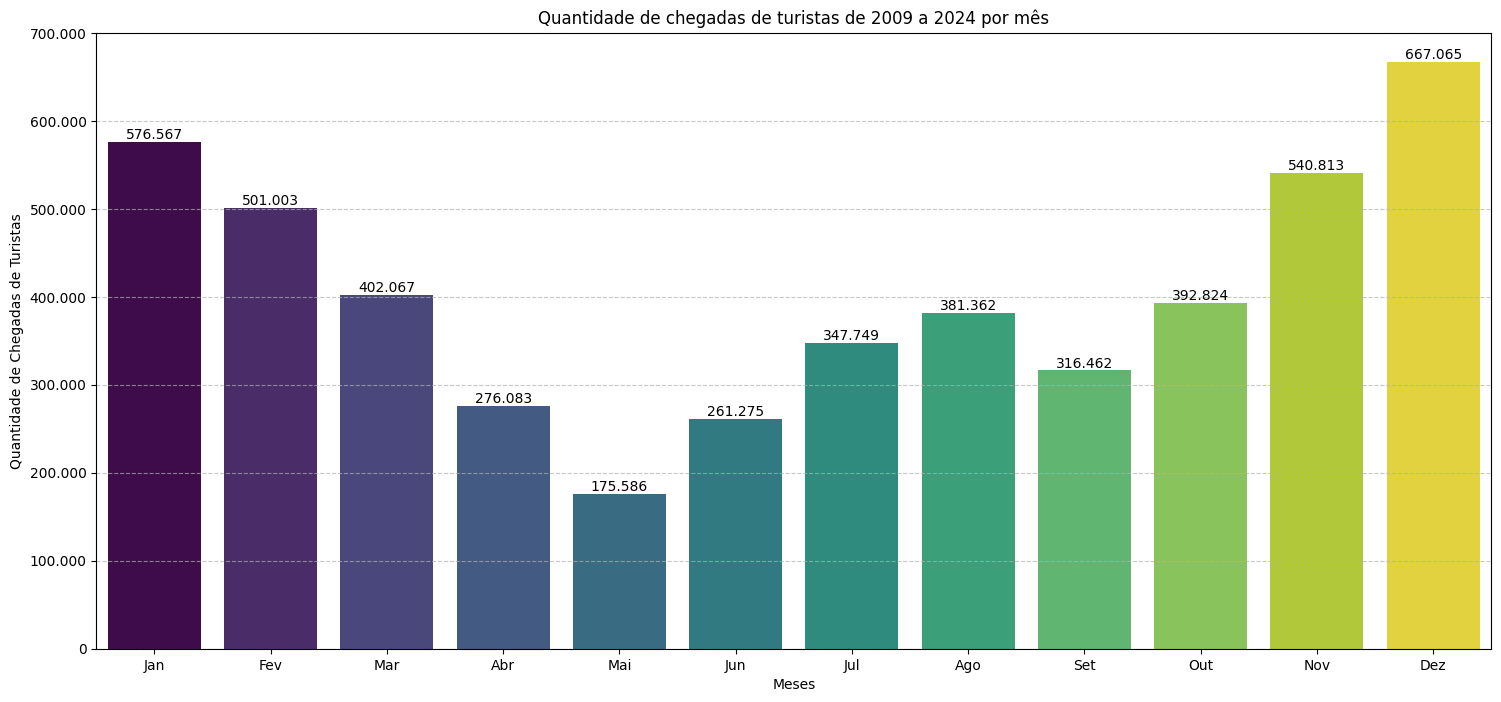

In [ ]:
# Agrupar chegadas por mês
chegadas_por_mes = chegada_nordeste.groupby("Mês")["Chegadas"].sum().reset_index()

# Ordenar para evitar descontinuidade no gráfico
chegadas_mes_mes = chegadas_por_mes.sort_values(by=['Mês'])

# Imprimir todos os anos do período
anos_do_periodo = np.sort(chegada_nordeste['Ano'].unique())
primeiro_ano = anos_do_periodo[0]
ultimo_ano = anos_do_periodo[-1]
# Criar o gráfico de barras
fig = plt.figure(figsize=(18, 8))
sns.barplot(data=chegadas_por_mes, x="Mês", y="Chegadas", hue="Mês", palette="viridis", legend=False)
# Personalizações do gráfico
plt.title(f"Quantidade de chegadas de turistas de {primeiro_ano} a {ultimo_ano} por mês")
plt.xlabel("Meses")
plt.ylabel("Quantidade de Chegadas de Turistas")
plt.xticks(range(0, 12), labels=['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
# Aplicar o formatador no eixo y
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_quantidade))
# Adicionar valores no topo de cada barra
for p in plt.gca().patches:
    plt.text(p.get_x() + p.get_width() / 2., p.get_height() + 5,  # Posição do texto
             f'{int(p.get_height()):,}'.replace(",","."),  # Exibir valor formatado
             ha='center', va='bottom', fontsize=10)
# Adicionar grid no eixo y
plt.grid(axis="y", linestyle="--", alpha=0.7)
# Exibir o gráfico
plt.show()

O gráfico "**Número de Chegadas de Turistas por Mês**" apresenta a distribuição mensal do número de chegadas de turistas ao longo de um ano, com os valores variando de 0 a 600.000 chegadas. Principais pontos observados:
* **Eixo X (Horizontal):** Representa os meses do ano, de Janeiro (Jan) a Dezembro (Dez).
* **Eixo Y (Vertical):** Representa o número de chegadas de turistas, variando de 0 a 600.000, com intervalos de 100.000.

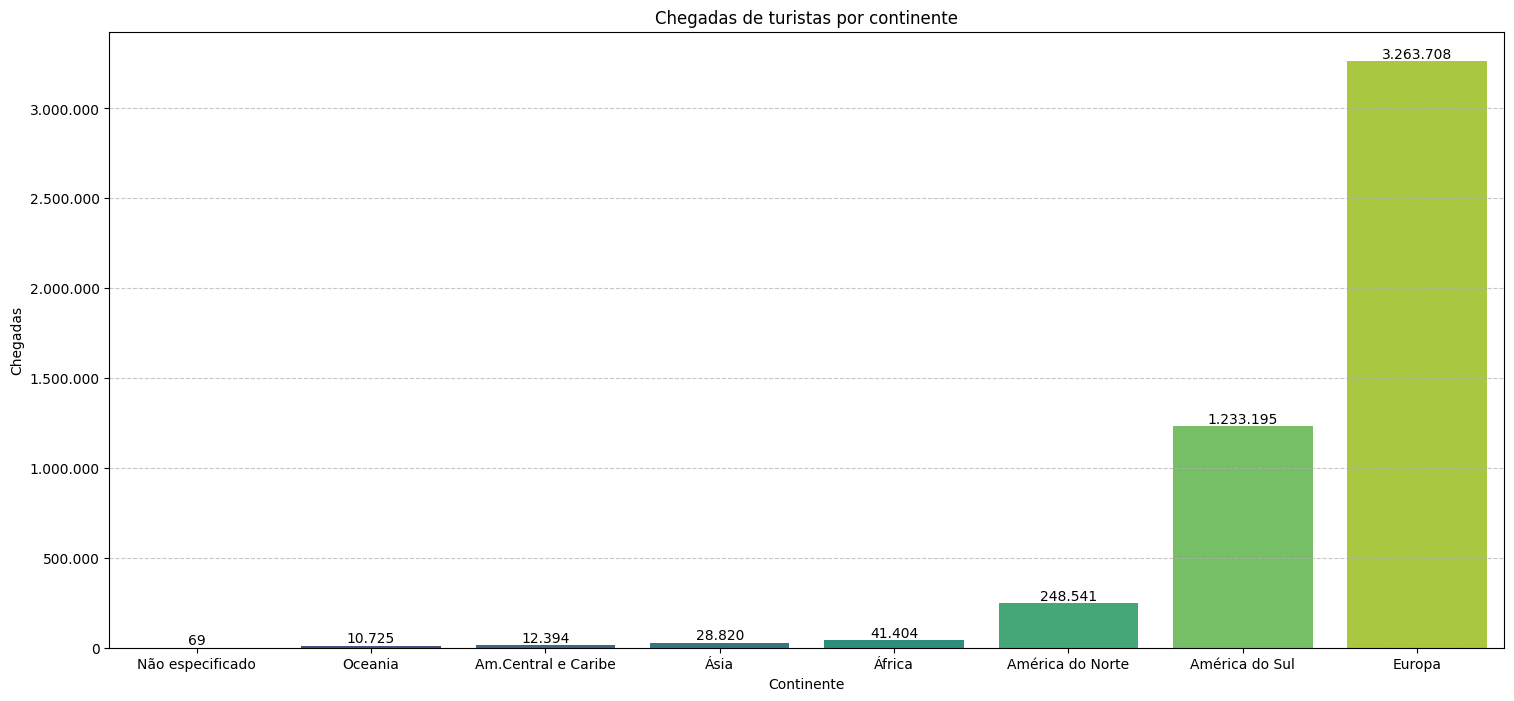

In [ ]:
# Modificar os rótulos dos continentes
chegada_nordeste['Continente'] = chegada_nordeste['Continente'].replace({
    'Continente não especificado': 'Não especificado',
    'América Central e Caribe': 'Am.Central e Caribe'
})
# Agrupar chegadas por 'Continente'
chegadas_por_continente = chegada_nordeste.groupby('Continente')['Chegadas'].sum().reset_index()
# Ordenar em ordem crescente os valores por 'Chegadas'
chegadas_por_continente = chegadas_por_continente.sort_values(by=['Chegadas'])
# Configurar Gráfico
plt.figure(figsize=(18, 8))
sns.barplot(data=chegadas_por_continente, x="Continente", y="Chegadas", hue="Continente", palette="viridis", legend=False)
# Adicionar rótulos em cada ponto
for x, y in zip(chegadas_por_continente['Continente'], chegadas_por_continente['Chegadas']):
    plt.text(x, y, f'{y:,}'.replace(",","."), color='black', ha='center', va='bottom', fontsize=10)
plt.title('Chegadas de turistas por continente')
plt.xlabel('Continente')
plt.ylabel('Chegadas')
plt.grid(axis="y", linestyle="--", alpha=0.7)
# Aplicar o formatador no eixo y
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_quantidade))
# Exibir Gráfico
plt.show()

O gráfico "**Chegadas de Turistas por Continente**" apresenta a distribuição do número de chegadas de turistas por continente. Principais pontos observados:
* **Eixo X (Horizontal):** Representa os continentes, incluindo:
  * África;
  * Oceania;
  * América Central e Caribe;
  * Ásia;
  * América do Norte;
  * Europa;
  * América do Sul;
  * Continente não especificado.
* **Eixo Y (Vertical):** Representa o número de chegadas de turistas, indicando a variação no fluxo de turistas para cada continente.

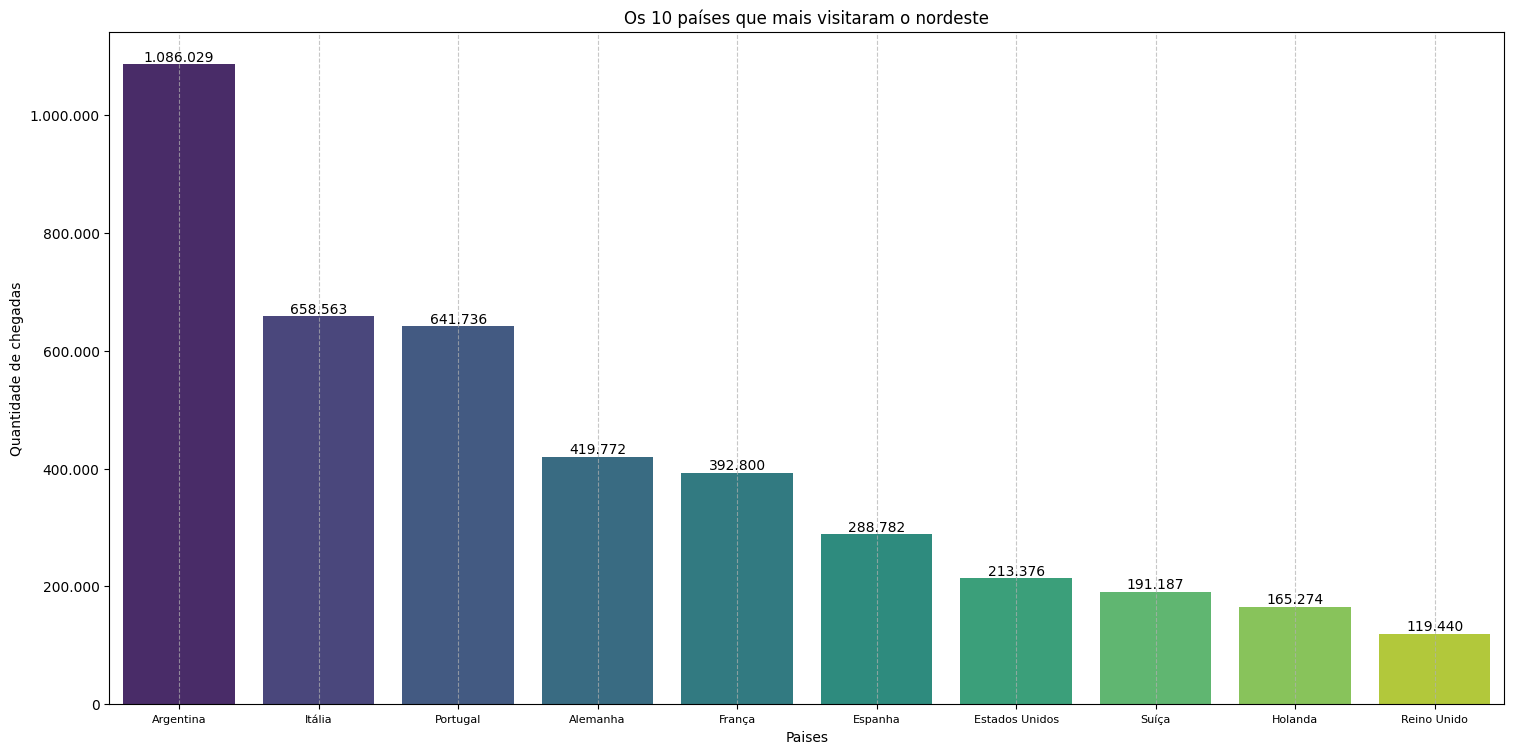

In [ ]:
# Selecionar os 10 países com mais chegadas
top_paises = chegada_nordeste.groupby("País")["Chegadas"].sum().nlargest(10).reset_index()
# Criar o gráfico de barras
plt.figure(figsize=(18, 8))
ax = sns.barplot(data=top_paises, x="País", y="Chegadas", hue="País", palette="viridis")
# Personalizações do gráfico
plt.title("Os 10 países que mais visitaram o nordeste")
plt.xlabel("Paises",fontsize=10)
plt.ylabel("Quantidade de chegadas")
plt.grid(axis="x", linestyle="--", alpha=0.7)
# Adicionar rótulos em cada ponto
for x, y in zip(top_paises['País'], top_paises['Chegadas']):
    plt.text(x, y, f'{y:,}'.replace(",","."), color='black', ha='center', va='bottom', fontsize=10)
# Formando eixo Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_quantidade))
# Ajuste do tamanho da fonte dos rótulos do eixo X
plt.xticks(fontsize=8)
# Margem superior
plt.subplots_adjust(top=0.95)
# Exibir o gráfico
plt.show()

O gráfico "**Top 10 Países que Mais Visitam o Nordeste**" apresenta uma lista dos países que mais enviam turistas para a região Nordeste do Brasil. Principais pontos observados:
* **Eixo X (Horizontal):** Apresenta os principais países emissores de turistas para o Nordeste.
* **Eixo Y (Vertical):** Representa o número de chegadas de turistas.

# 5. Aplicação de Técnicas de Aprendizado de Máquina:
* Seleção de Modelos: **RandomForest**.
* Treinamento e Validação do Modelo: Dividir os dados em conjuntos de treinamento e teste.

In [ ]:
# Aplicar One-Hot Encoding em todas as colunas categóricas
chegada_nordeste = pd.get_dummies(chegada_nordeste, columns=['Continente', 'País', 'UF', 'Via de acesso', 'Ano', 'Mês'], dtype=float)

# Separar as variáveis independentes (X) e dependente (y)
X = chegada_nordeste.drop(columns=['Chegadas'])  # Features
y = chegada_nordeste['Chegadas']  # Target variable

# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

  * Treinar o modelo escolhido com os dados de treinamento e
validar sua eficácia com os dados de teste.

In [ ]:
# Criar o modelo Random Forest Regressor
model = RandomForestRegressor(random_state=42)

# Definir o espaço de busca de hiperparâmetros
param_dist = {
    'n_estimators': np.arange(10, 201, 10),  # Intervalo de valores para n_estimators
    'max_depth': [None, 10, 20, 30],  # Valores para max_depth
    'min_samples_split': [2, 5, 10],  # Valores para min_samples_split
    'min_samples_leaf': [1, 2, 4]  # Valores para min_samples_leaf
}

# Aplicar RandomizedSearchCV com validação cruzada (3 folds para maior velocidade)
random_search = RandomizedSearchCV(
    model,
    param_distributions=param_dist,
    n_iter=3,  # Número de combinações aleatórias a serem testadas
    cv=2,  # Número de folds na validação cruzada
    scoring='r2',  # Métrica de avaliação
    n_jobs=-1,  # Usar todos os núcleos da CPU
    verbose=2,  # Mostrar progresso
    random_state=42
)

# Treinar o modelo com RandomizedSearchCV
random_search.fit(X_train, y_train)

# Melhor valor de n_estimators encontrado
best_params = random_search.best_params_
print(f"Melhores hiperparâmetros encontrados: {best_params}")

# Treinar o modelo final com os melhores hiperparâmetros
best_model = RandomForestRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = best_model.predict(X_test)

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Melhores hiperparâmetros encontrados: {'n_estimators': np.int64(160), 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_depth': 20}


* Avaliação do Modelo: Utilizar métricas apropriadas (ex.: RMSE, R²) para avaliar a performance do modelo.

In [ ]:
# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
print(f"Coeficiente de Determinação (R²): {r2:.2f}")

Erro Quadrático Médio (MSE): 20653.58
Coeficiente de Determinação (R²): 0.72


**Explicação dos Resultados**
* **Erro Quadrático Médio (MSE):** Mede o erro médio das previsões. Quanto menor o MSE, melhor o modelo está ajustado, pois indica que os erros (diferença entre valores reais e previstos) são menores.
* **Coeficiente de Determinação (R²):** Mede a proporção da variância nos dados que é explicada pelo modelo. Varia de 0 a 1. Quanto mais próximo de 1, melhor o modelo em termos de explicação dos dados.

# 6. Interpretação dos Resultados:
* Análise dos Resultados:
  * Interpretar os resultados obtidos e entender o que os
modelos estão revelando sobre o fluxo de turistas e os
fatores que influenciam a visitação.
  * Identificar insights significativos e tendências relevantes.


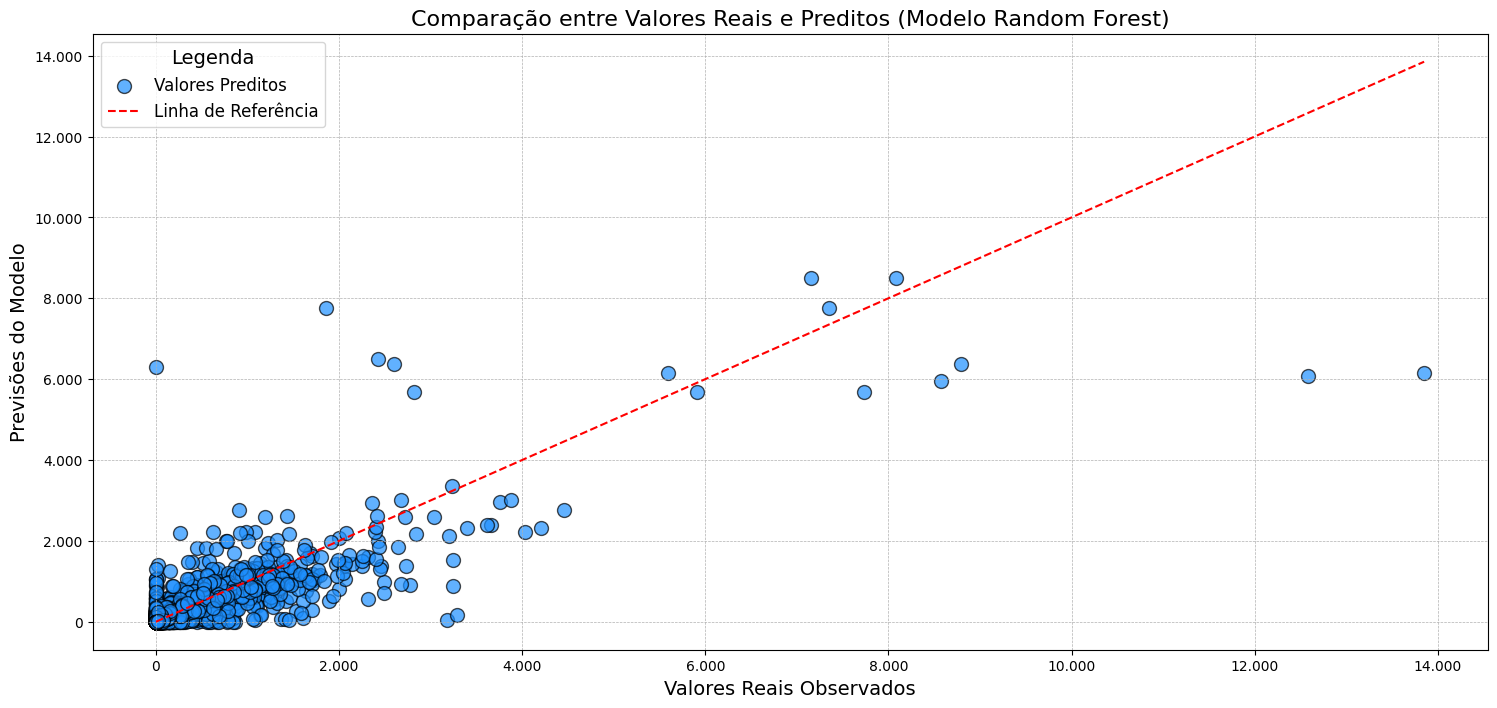

In [ ]:
plt.figure(figsize=(18, 8))
plt.scatter(y_test, y_pred, color='dodgerblue', alpha=0.7, s=100, edgecolor='black', label='Valores Preditos')
# Formatando o eixo X e Y
plt.gca().yaxis.set_major_formatter(FuncFormatter(formatar_quantidade))
plt.gca().xaxis.set_major_formatter(FuncFormatter(formatar_quantidade))
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Linha de Referência')
plt.xlabel('Valores Reais Observados', fontsize=14)
plt.ylabel('Previsões do Modelo', fontsize=14)
plt.title('Comparação entre Valores Reais e Preditos (Modelo Random Forest)',fontsize=16)
# Adicionando grids para facilitar a leitura
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
# Ajustando a posição da legenda
plt.legend(loc='upper left', fontsize=12, title="Legenda", title_fontsize=14)
plt.show()

Este gráfico "**Valores Reais vs. Preditos (Random Forest)**" e ilustra a relação entre os valores reais e os valores previstos por um modelo de Random Forest. Elementos principais do gráfico:
* **Eixo X (Valores Reais):** Representa os valores observados (reais) do conjunto de dados.
* **Eixo Y (Valores Preditos):** Representa os valores que o modelo de Random Forest previu.
* **Pontos azuis:** Cada ponto reflete uma observação no conjunto de dados, comparando o valor real (no eixo X) com o valor predito (no eixo Y).
* **Linha de referência (vermelha, pontilhada):** Indica a linha ideal onde os valores previstos seriam exatamente iguais aos reais (𝑦=𝑥).

**Análise:** Boa performance: Os pontos mais próximos da linha vermelha indicam previsões precisas do modelo, ou seja, o valor predito está próximo do valor real.

**Desvios:** Pontos afastados da linha vermelha revelam discrepâncias entre os valores reais e previstos. No entanto, observa-se que essas discrepâncias aumentam, especialmente para valores maiores.

In [ ]:
# Converter Chegadas em classes (0 = Baixa, 1 = Alta)
y_test_class = np.where(y_test > 800, 1, 0)
y_pred_class = np.where(y_pred > 800, 1, 0)

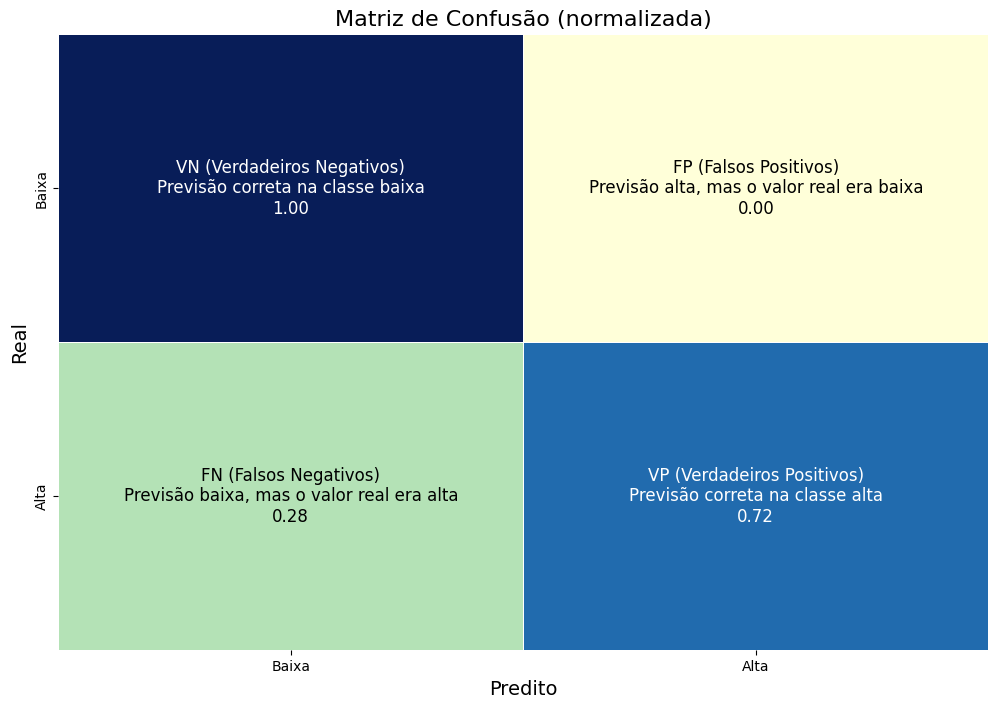

In [ ]:
# Calcular a matriz de confusão
cm = confusion_matrix(y_test_class, y_pred_class)
# Normalizando a matriz de confusão
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Plotar a matriz de confusão
#plt.figure(figsize=(8, 6))
plt.figure(figsize=(12, 8))
sns_heatmap = sns.heatmap(cm_normalized, annot=False, cmap='YlGnBu', cbar=False,
                         xticklabels=['Baixa', 'Alta'], yticklabels=['Baixa', 'Alta'],
                         linewidths=0.5)
# Definir as etiquetas e concatenar com os valores numéricos
# Criar uma matriz com os textos 'VP', 'FP', 'FN', 'VN' e os valores numéricos
for i in range(2):
    for j in range(2):
        # Obter o valor numérico da célula
        value = cm_normalized[i, j]
        # Identificar os rótulos de cada célula
        if i == 0 and j == 0:
            label1 = 'VN (Verdadeiros Negativos)'
            label2 = 'Previsão correta na classe baixa'
        elif i == 0 and j == 1:
            label1 = 'FP (Falsos Positivos)'
            label2 = 'Previsão alta, mas o valor real era baixa'
        elif i == 1 and j == 0:
            label1 = 'FN (Falsos Negativos)'
            label2 = 'Previsão baixa, mas o valor real era alta'
        elif i == 1 and j == 1:
            label1 = 'VP (Verdadeiros Positivos)'
            label2 = 'Previsão correta na classe alta'
        # Definir o texto a ser exibido (etiqueta e valor)
        text_value = f"{value:.2f}"
        # Ajustando a cor do texto com base no valor da célula (para contraste)
        if value < 0.5:  # Para valores mais baixos (geralmente mais escuros)
            text_color = 'black'  # Cor clara para maior contraste
        else:  # Para valores mais altos (geralmente mais claros)
            text_color = 'white'  # Cor escura para maior contraste
        # Colocar a etiqueta e o valor numérico dentro da célula
        # Offset adicional para centralizar o texto
        plt.text(j + 0.5, i + 0.5, f"{label1}\n{label2}\n{text_value}", ha='center', va='center', fontsize=12, color=text_color)
plt.xlabel('Predito', fontsize=14)
plt.ylabel('Real', fontsize=14)
plt.title('Matriz de Confusão (normalizada)', fontsize=16)
plt.show()

A Matriz de Confusão é uma ferramenta utilizada para avaliar o desempenho de um modelo de classificação. Ela compara as previsões do modelo com os valores reais (ou verdadeiros) e organiza os resultados em quatro categorias:
* **Estrutura da Matriz de Confusão:**
  * Valores Reais (Real):
    * Baixa: Representa os casos em que o valor real era "Baixa".
    * Alta: Representa os casos em que o valor real era "Alta".
  * Valores Previstos (Previsto):
    * Baixa: Representa os casos em que o modelo previu "Baixa".
    * Alta: Representa os casos em que o modelo previu "Alta".
* **Células da Matriz:**
  * Verdadeiros Positivos (VP): Casos em que o modelo previu corretamente a classe "Alta". Neste caso: 212.
  * Falsos Positivos (FP): Casos em que o modelo previu "Alta", mas o valor real era "Baixa". Neste caso: 83.
  * Verdadeiros Negativos (VN): Casos em que o modelo previu corretamente a classe "Baixa". Neste caso: 22221.
  * Falsos Negativos (FN): Casos em que o modelo previu "Baixa", mas o valor real era "Alta". Neste caso: 75.

  A matriz de confusão mostra que o modelo tem um desempenho geral muito bom, com uma alta acurácia de aproximadamente 99.3%. Em resumo, o modelo é eficaz para prever a classe "Baixa", mas pode precisar de ajustes para melhorar a previsão da classe "Alta". Isso pode envolver a coleta de mais dados, o balanceamento das classes ou a escolha de um modelo mais adequado. Em resumo, o modelo é eficaz para prever a classe "Baixa", mas pode precisar de ajustes para melhorar a previsão da classe "Alta". Isso pode envolver a coleta de mais dados, o balanceamento das classes ou a escolha de um modelo mais adequado.

In [ ]:
# Calculando as métricas de classificação usando as classes convertidas
accuracy = accuracy_score(y_test_class, y_pred_class)     #Acurária: proporção de previsões corretas sobre o total de previsões
precision = precision_score(y_test_class, y_pred_class)   #Precisão: proporção de verdadeiros positivos sobre o total de elementos classificados como positivos
recall = recall_score(y_test_class, y_pred_class)         #Recall: proporção de verdadeiros positivos sobre o total de elementos que realmente são positivos
f1 = f1_score(y_test_class, y_pred_class)                 #F1-score: média harmônica entre precisão e recall
roc_auc = roc_auc_score(y_test_class, y_pred_class)       #Curva ROC (Receiver Operating Characteristic): avalia a capacidade do modelo de distinguir entre classes #This line needs to be modified since y_pred_class doesn't have probability

print(f'Acurácia: {accuracy:.2f}')
print(f'Precisão: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1-score: {f1:.2f}')
print(f'Curva ROC: {roc_auc}')

Acurácia: 0.99
Precisão: 0.73
Recall: 0.72
F1-score: 0.72
Curva ROC: 0.8561053324462613


* **Métricas de Avaliação**
  * A **acurácia** mede a proporção de previsões corretas (tanto positivas quanto negativas) em relação ao total de previsões.
  * A **precisão** mede a proporção de previsões positivas corretas em relação ao total de previsões positivas feitas pelo modelo.
  * O **recall** (ou sensibilidade) mede a proporção de casos positivos reais que foram corretamente identificados pelo modelo.
  * O **F1-score** é a média harmônica entre precisão e recall, equilibrando as duas métricas.
  * A **curva ROC** (Receiver Operating Characteristic) mede a capacidade do modelo de distinguir entre as classes. A área sob a curva (AUC) varia de 0 a 1, onde 1 representa um modelo perfeito.

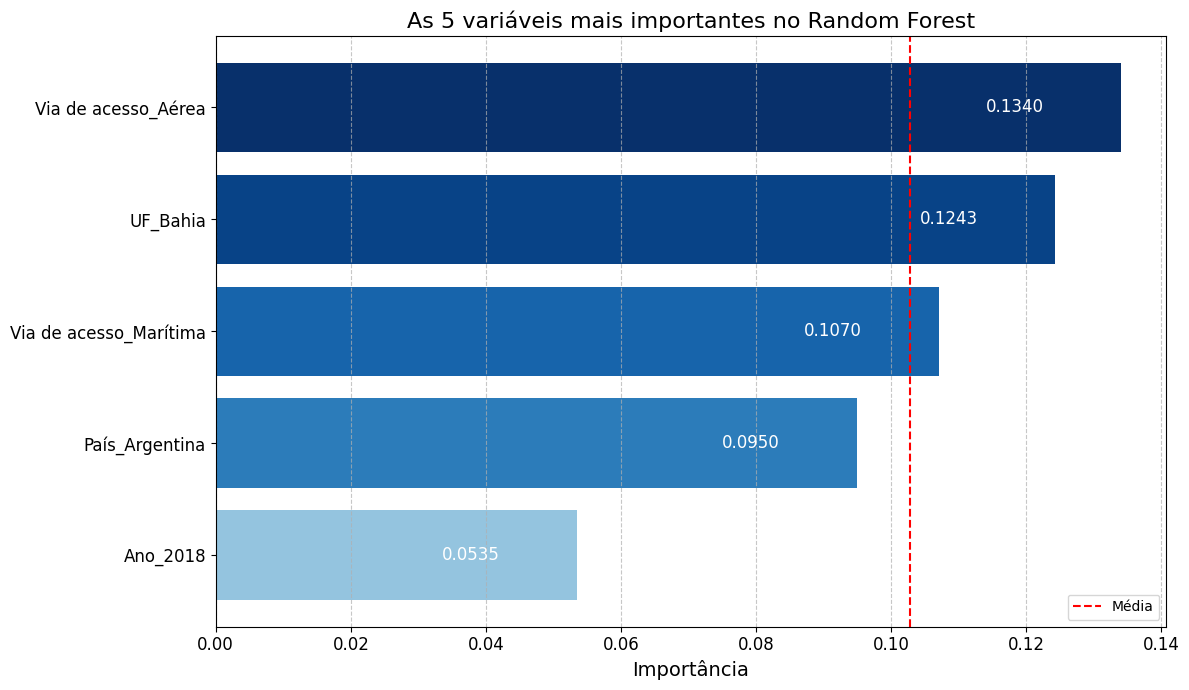

In [ ]:
# Analisar a importância das variáveis
importances = best_model.feature_importances_
feature_names = X.columns
# Criar um DataFrame para visualização
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
# Selecionar apenas as 5 variáveis mais importantes
top_5_importance_df = importance_df.head(5)
# Plotar a importância das 5 variáveis mais importantes
plt.figure(figsize=(12, 7))
#bars = plt.barh(top_5_importance_df['Feature'], top_5_importance_df['Importance'], color='skyblue')
# Usar uma coloração gradiente para as barras
bars = plt.barh(top_5_importance_df['Feature'], top_5_importance_df['Importance'], color=plt.cm.Blues(top_5_importance_df['Importance'] / max(top_5_importance_df['Importance'])))
# Adicionar rótulos nas barras
for bar in bars:
    plt.text(bar.get_width() - 0.02, bar.get_y() + bar.get_height() / 2,
             f'{bar.get_width():.4f}', va='center', ha='left', color='white', fontsize=12)
# Adicionar uma linha de base no gráfico (média das importâncias)
plt.axvline(x=top_5_importance_df['Importance'].mean(), color='red', linestyle='--', label='Média')
plt.xlabel('Importância', fontsize=14)
plt.title('As 5 variáveis mais importantes no Random Forest', fontsize=16)
plt.gca().invert_yaxis()  # Inverter o eixo Y para exibir a mais importante no topo
plt.grid(True, axis='x', linestyle='--', alpha=0.7)  # Grade no eixo X
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Exibir a legenda para a linha de média
plt.legend()
# Exibir o gráfico
plt.tight_layout()
plt.show()

O gráfico "**Top 5 Variáveis Mais Importantes no Random Forest**" apresenta as cinco variáveis mais relevantes para o modelo *Random Forest* na tomada de decisão do modelo.